In [1]:
# Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in
# sklearn.datasets.

In [3]:
from sklearn.datasets import load_iris
from sklearn import datasets

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

In [40]:
iris=load_iris()

In [41]:
X=iris.data

In [42]:
y=iris.target

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
k=3
knn=KNeighborsClassifier(n_neighbors=k)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
prediction=knn.predict(X_test)

In [47]:
print(confusion_matrix(y_test, prediction))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [48]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [23]:
# Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in
# sklearn.datasets.

In [49]:
diabetes = datasets.load_diabetes()

In [50]:
X=diabetes.data
y=diabetes.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
k=5
knn_reg=KNeighborsRegressor(n_neighbors=k)

In [53]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [57]:
prediction=knn_reg.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

In [59]:
mse

3224.3695890410954

In [60]:
r2

0.43975256620686554

In [61]:
# Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using
# cross-validation on load_iris dataset in sklearn.datasets.

In [62]:
iris=load_iris()

In [63]:
X=iris.data
y=iris.target

In [64]:
k_range=range(1,31)

In [67]:
k_score=[]

for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_score.append(scores.mean())

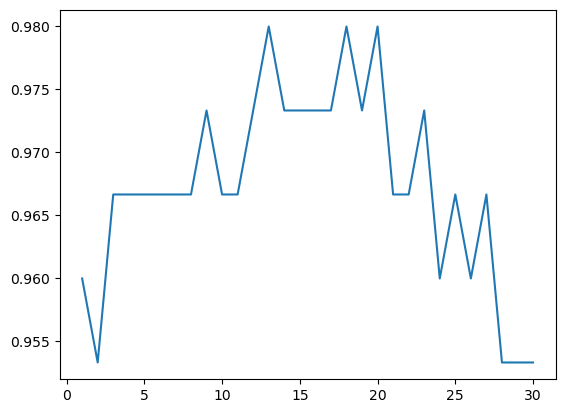

In [68]:
plt.plot(k_range,k_score)

In [69]:
optimal_k = k_range[k_score.index(max(k_score))]

In [70]:
optimal_k

13

In [1]:
# Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in
# sklearn.datasets.

In [5]:
diabetes = datasets.load_diabetes()
X=diabetes.data
y=diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
#feature scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
k=5
knn=KNeighborsRegressor(n_neighbors=k)

In [9]:
knn.fit(X_train_scaled,y_train)


KNeighborsRegressor()

In [11]:
predict=knn.predict(X_test_scaled)

In [12]:
mse=mean_squared_error(y_test,predict)

In [13]:
mse

3305.5778082191778

In [14]:
r2_score(y_test,predict)

0.4256423052268389

In [15]:
# Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on
# load_iris dataset in sklearn.datasets.

In [16]:
iris=load_iris()
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
k=5
knn=KNeighborsClassifier(n_neighbors=k,weights='distance')

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [20]:
predict=knn.predict(X_test)

In [21]:
confusion_matrix(y_test,predict)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [23]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [24]:
# Q6. Implement a function to standardise the features before applying KNN classifier.

In [25]:
def standard_and_apply_KNN(X,y,k=5,test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    
    predict=knn.predict(X_test_scaled)
    
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))
    

In [26]:
iris=load_iris()

In [27]:
X=iris.data
y=iris.target

In [28]:
standard_and_apply_KNN(X,y,k=5)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
# Q7. Write a Python function to calculate the euclidean distance between two points.

In [31]:
def eculidian_distance(point1,point2):
    if len(point1)!=len(point2):
        raise ValueError("Point must have same dimensions")
        
    distance=0
    for p1,p2 in zip(point1,point2):
        distance +=(p1-p2)**2
    return math.sqrt(distance)

In [32]:
point1=(1,2)
point2=(4,6)

In [33]:
eculidian_distance(point1,point2)

5.0

In [36]:
# Q8. Write a Python function to calculate the manhattan distance between two points.

In [45]:
def manhattan_distance(point1,point2):
     if len(point1)!=len(point2):
        raise ValueError("Point must have same dimensions")
        
    
     distance=0
     for p1,p2 in zip(point1,point2):
         distance +=abs(p1-p2)
     return distance

In [46]:
point1 = (1, 2)
point2 = (4, 6)

In [47]:
manhattan_distance(point1,point2)

7